In [170]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

In [167]:
l = pd.read_csv('/content/drive/MyDrive/Datasets/Movie Recommender/links.csv')
m = pd.read_csv('/content/drive/MyDrive/Datasets/Movie Recommender/movies.csv')
r = pd.read_csv('/content/drive/MyDrive/Datasets/Movie Recommender/ratings.csv')
t = pd.read_csv('/content/drive/MyDrive/Datasets/Movie Recommender/tags.csv')

Text(0.5, 1.0, 'Elbow diagram')

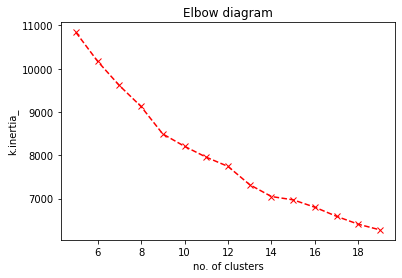

In [158]:
a = m.genres.str.get_dummies()

d = []
for i in range(5, 20):
  k = KMeans(n_clusters= i)
  k.fit(a)
  d.append(k.inertia_)

e = list(range(5, 20))
plt.plot(e, d, 'rx--')
plt.xlabel("no. of clusters")
plt.ylabel("k.inertia_")
plt.title("Elbow diagram")

# Elbow method for selecting the correct number of clusters. This graph will change a bit every time we run this code

In [159]:
# As can be seen from the graph that the slope of the curve has approximately reduced slightly at no. of clusters = 12

k = KMeans(n_clusters = 12)
k.fit(a)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=12, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [160]:
# Since whether a movie is seen by a user (or not) is not explicitly given, 
# it is assumed that a user has seen a movie if only he has gven a rating to that movie.

w = []
w_ = []

for i in m.movieId:
  w1 = r[r.movieId == i]
  rat = w1.rating.mean()
  if w1.empty == True:
    rat = 0
  w.append(len(w1))
  w_.append(round(rat, 1))

# 'w' contains the number of ratings for each movie
# 'w_' contains the average of all ratings for each movie

In [161]:
# Providing the link for imdb and tmdb for the respective movies

imdb = []
tmdb = []

i_l = 'http://www.imdb.com/title/tt'
t_l = 'https://www.themoviedb.org/movie/'

l.loc[l.tmdbId.isna(), "tmdbId"] = "NA"

for i, j in zip(l.imdbId, l.tmdbId):
  i = i_l + format(i, "07d")
  if j != "NA":
    j = t_l + str(int(j))

  imdb.append(i)
  tmdb.append(j)

In [168]:
# Splitting up the title containing the name as well as the year into name and year separately

title = m.title.str.rsplit(' (', 1)
m.title = title.str[0]

year = title.str[-1].str.extract("([0-9]+)\)")
year = year.values.reshape(len(year))

In [169]:
# Creating a dataframe containing all necessary columns
# With this, the data preparation is complete

x = pd.DataFrame({'cluster no.': k.labels_, 'release year': year, 'no. of reviews': w, 'ratings': w_, 'IMDB link': imdb, 'TMDB Link': tmdb})
m1 = pd.concat([m, x], axis = 'columns')
m1 = m1.sort_values(["no. of reviews", "ratings"], ascending = False)

print("Top movies:")
display(m1.drop("cluster no.", axis = 'columns').head(15))

# This will return the top 15 movie irrespective of their genre

Top movies:


,movieId,title,genres,release year,no. of reviews,ratings,IMDB link,TMDB Link
314,356,Forrest Gump,Comedy|Drama|Romance|War,1994,329,4.2,http://www.imdb.com/title/tt0109830,https://www.themoviedb.org/movie/13
277,318,"Shawshank Redemption, The",Crime|Drama,1994,317,4.4,http://www.imdb.com/title/tt0111161,https://www.themoviedb.org/movie/278
257,296,Pulp Fiction,Comedy|Crime|Drama|Thriller,1994,307,4.2,http://www.imdb.com/title/tt0110912,https://www.themoviedb.org/movie/680
510,593,"Silence of the Lambs, The",Crime|Horror|Thriller,1991,279,4.2,http://www.imdb.com/title/tt0102926,https://www.themoviedb.org/movie/274
1939,2571,"Matrix, The",Action|Sci-Fi|Thriller,1999,278,4.2,http://www.imdb.com/title/tt0133093,https://www.themoviedb.org/movie/603
224,260,Star Wars: Episode IV - A New Hope,Action|Adventure|Sci-Fi,1977,251,4.2,http://www.imdb.com/title/tt0076759,https://www.themoviedb.org/movie/11
418,480,Jurassic Park,Action|Adventure|Sci-Fi|Thriller,1993,238,3.8,http://www.imdb.com/title/tt0107290,https://www.themoviedb.org/movie/329
97,110,Braveheart,Action|Drama|War,1995,237,4.0,http://www.imdb.com/title/tt0112573,https://www.themoviedb.org/movie/197
507,589,Terminator 2: Judgment Day,Action|Sci-Fi,1991,224,4.0,http://www.imdb.com/title/tt0103064,https://www.themoviedb.org/movie/280
461,527,Schindler's List,Drama|War,1993,220,4.2,http://www.imdb.com/title/tt0108052,https://www.themoviedb.org/movie/424


In [164]:
# The cluster() will get the cluster a movie belongs to, given a movie name, with a error message in case of wrong movie name
# and then calls suggest() with the cluster number

def cluster(movie):
  cls = m1[m1.title == movie]["cluster no."]
  if cls.empty == True:
    print("Wrong movie name")
    return
  print("The related movies are: \n")
  suggest(int(cls))

# The suggest() will display the top movies of a particular cluster 'cls'

def suggest(cls, mov = m1, n = 15): 
  new_df = mov[(mov["cluster no."] == cls) & (mov.ratings >= 3)]
  display(new_df.drop("cluster no.", axis = 'columns').head(n))

In [165]:
# Enter the movie name as exactly given the movies title list
# This will display the top movies related to the name (or genre) of a movie

movie = input('Enter your fav movie name: ')
cluster(movie)

Enter your fav movie name: Usual Suspects, The
The related movies are: 



,movieId,title,genres,release year,no. of reviews,ratings,IMDB link,TMDB Link
2226,2959,Fight Club,Action|Crime|Drama|Thriller,1999,218,4.3,http://www.imdb.com/title/tt0137523,https://www.themoviedb.org/movie/550
46,50,"Usual Suspects, The",Crime|Mystery|Thriller,1995,204,4.2,http://www.imdb.com/title/tt0114814,https://www.themoviedb.org/movie/629
509,592,Batman,Action|Crime|Thriller,1989,189,3.4,http://www.imdb.com/title/tt0096895,https://www.themoviedb.org/movie/268
334,377,Speed,Action|Romance|Thriller,1994,171,3.5,http://www.imdb.com/title/tt0111257,https://www.themoviedb.org/movie/1637
325,367,"Mask, The",Action|Comedy|Crime|Fantasy,1994,157,3.2,http://www.imdb.com/title/tt0110475,https://www.themoviedb.org/movie/854
6710,58559,"Dark Knight, The",Action|Crime|Drama|IMAX,2008,149,4.2,http://www.imdb.com/title/tt0468569,https://www.themoviedb.org/movie/155
793,1036,Die Hard,Action|Crime|Thriller,1988,145,3.9,http://www.imdb.com/title/tt0095016,https://www.themoviedb.org/movie/562
138,165,Die Hard: With a Vengeance,Action|Crime|Thriller,1995,144,3.6,http://www.imdb.com/title/tt0112864,https://www.themoviedb.org/movie/1572
7372,79132,Inception,Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,2010,143,4.1,http://www.imdb.com/title/tt1375666,https://www.themoviedb.org/movie/27205
254,293,Léon: The Professional (a.k.a. The Professiona...,Action|Crime|Drama|Thriller,1994,133,4.0,http://www.imdb.com/title/tt0110413,https://www.themoviedb.org/movie/101


In [166]:
user = int(input("Enter the user ID: "))

# The following function will take in user ID as input and display the top 5 movies of each genres (or clusters)
# for movies he rated 3 or above (i.e. he liked the movie)
# Also he won't be suggested the movie that he has already seen (i.e. already rated)
# The user will aso be recommended top 3 movies from other genres too

def movies(user):
  if user not in r.userId.unique():
    print("Wrong user ID")
    return
    
  xs = r[(r.rating >= 3) & (r.userId == user)]['movieId']
  xs1 = r[(r.userId == user)]['movieId']

  c = []
  m2 = m1.copy()

  for i in list(xs1):            # This uses content based filtering
    m2 = m2[m2.movieId != i]
    if i in list(xs):
      c1 = int(m1[m1.movieId == i]["cluster no."])
      if c1 not in c:
        c.append(c1)

  print("The related movies are: \n")
  for i in c:
    suggest(i, m2, 5)
  
  all_c = set(range(12)) - set(c)
  if len(all_c) != 0:
    print("\nTop movies from other genres include: \n")
    for i in all_c:
      suggest(i, m2, 3)

movies(user)

Enter the user ID: 3
The related movies are: 



,movieId,title,genres,release year,no. of reviews,ratings,IMDB link,TMDB Link
224,260,Star Wars: Episode IV - A New Hope,Action|Adventure|Sci-Fi,1977,251,4.2,http://www.imdb.com/title/tt0076759,https://www.themoviedb.org/movie/11
418,480,Jurassic Park,Action|Adventure|Sci-Fi|Thriller,1993,238,3.8,http://www.imdb.com/title/tt0107290,https://www.themoviedb.org/movie/329
898,1196,Star Wars: Episode V - The Empire Strikes Back,Action|Adventure|Sci-Fi,1980,211,4.2,http://www.imdb.com/title/tt0080684,https://www.themoviedb.org/movie/1891
615,780,Independence Day (a.k.a. ID4),Action|Adventure|Sci-Fi|Thriller,1996,202,3.4,http://www.imdb.com/title/tt0116629,https://www.themoviedb.org/movie/602
900,1198,Raiders of the Lost Ark (Indiana Jones and the...,Action|Adventure,1981,200,4.2,http://www.imdb.com/title/tt0082971,https://www.themoviedb.org/movie/85


,movieId,title,genres,release year,no. of reviews,ratings,IMDB link,TMDB Link
1939,2571,"Matrix, The",Action|Sci-Fi|Thriller,1999,278,4.2,http://www.imdb.com/title/tt0133093,https://www.themoviedb.org/movie/603
507,589,Terminator 2: Judgment Day,Action|Sci-Fi,1991,224,4.0,http://www.imdb.com/title/tt0103064,https://www.themoviedb.org/movie/280
31,32,Twelve Monkeys (a.k.a. 12 Monkeys),Mystery|Sci-Fi|Thriller,1995,177,4.0,http://www.imdb.com/title/tt0114746,https://www.themoviedb.org/movie/63
1183,1580,Men in Black (a.k.a. MIB),Action|Comedy|Sci-Fi,1997,165,3.5,http://www.imdb.com/title/tt0119654,https://www.themoviedb.org/movie/607
939,1240,"Terminator, The",Action|Sci-Fi|Thriller,1984,131,3.9,http://www.imdb.com/title/tt0088247,https://www.themoviedb.org/movie/218


,movieId,title,genres,release year,no. of reviews,ratings,IMDB link,TMDB Link
510,593,"Silence of the Lambs, The",Crime|Horror|Thriller,1991,279,4.2,http://www.imdb.com/title/tt0102926,https://www.themoviedb.org/movie/274
915,1214,Alien,Horror|Sci-Fi,1979,146,4.0,http://www.imdb.com/title/tt0078748,https://www.themoviedb.org/movie/348
957,1258,"Shining, The",Horror,1980,109,4.1,http://www.imdb.com/title/tt0081505,https://www.themoviedb.org/movie/694
1067,1387,Jaws,Action|Horror,1975,91,4.0,http://www.imdb.com/title/tt0073195,https://www.themoviedb.org/movie/578
920,1219,Psycho,Crime|Horror,1960,83,4.0,http://www.imdb.com/title/tt0054215,https://www.themoviedb.org/movie/539


,movieId,title,genres,release year,no. of reviews,ratings,IMDB link,TMDB Link
969,1270,Back to the Future,Adventure|Comedy|Sci-Fi,1985,171,4.0,http://www.imdb.com/title/tt0088763,https://www.themoviedb.org/movie/105
302,344,Ace Ventura: Pet Detective,Comedy,1994,161,3.0,http://www.imdb.com/title/tt0109040,https://www.themoviedb.org/movie/3049
863,1136,Monty Python and the Holy Grail,Adventure|Comedy|Fantasy,1975,136,4.2,http://www.imdb.com/title/tt0071853,https://www.themoviedb.org/movie/762
197,231,Dumb & Dumber (Dumb and Dumber),Adventure|Comedy,1994,133,3.1,http://www.imdb.com/title/tt0109686,https://www.themoviedb.org/movie/8467
504,586,Home Alone,Children|Comedy,1990,116,3.0,http://www.imdb.com/title/tt0099785,https://www.themoviedb.org/movie/771



Top movies from other genres include: 



,movieId,title,genres,release year,no. of reviews,ratings,IMDB link,TMDB Link
964,1265,Groundhog Day,Comedy|Fantasy|Romance,1993,143,3.9,http://www.imdb.com/title/tt0107048,https://www.themoviedb.org/movie/137
514,597,Pretty Woman,Comedy|Romance,1990,135,3.5,http://www.imdb.com/title/tt0100405,https://www.themoviedb.org/movie/114
3622,4973,"Amelie (Fabuleux destin d'Amélie Poulain, Le)",Comedy|Romance,2001,120,4.2,http://www.imdb.com/title/tt0211915,https://www.themoviedb.org/movie/194


,movieId,title,genres,release year,no. of reviews,ratings,IMDB link,TMDB Link
257,296,Pulp Fiction,Comedy|Crime|Drama|Thriller,1994,307,4.2,http://www.imdb.com/title/tt0110912,https://www.themoviedb.org/movie/680
43,47,Seven (a.k.a. Se7en),Mystery|Thriller,1995,203,4.0,http://www.imdb.com/title/tt0114369,https://www.themoviedb.org/movie/807
398,457,"Fugitive, The",Thriller,1993,190,4.0,http://www.imdb.com/title/tt0106977,https://www.themoviedb.org/movie/5503


,movieId,title,genres,release year,no. of reviews,ratings,IMDB link,TMDB Link
4012,5669,Bowling for Columbine,Documentary,2002,58,3.8,http://www.imdb.com/title/tt0310793,https://www.themoviedb.org/movie/1430
695,913,"Maltese Falcon, The",Film-Noir|Mystery,1941,44,4.2,http://www.imdb.com/title/tt0033870,https://www.themoviedb.org/movie/963
5255,8622,Fahrenheit 9/11,Documentary,2004,37,3.5,http://www.imdb.com/title/tt0361596,https://www.themoviedb.org/movie/1777


,movieId,title,genres,release year,no. of reviews,ratings,IMDB link,TMDB Link
314,356,Forrest Gump,Comedy|Drama|Romance|War,1994,329,4.2,http://www.imdb.com/title/tt0109830,https://www.themoviedb.org/movie/13
436,500,Mrs. Doubtfire,Comedy|Drama,1993,144,3.4,http://www.imdb.com/title/tt0107614,https://www.themoviedb.org/movie/788
1267,1682,"Truman Show, The",Comedy|Drama|Sci-Fi,1998,125,3.8,http://www.imdb.com/title/tt0120382,https://www.themoviedb.org/movie/37165


,movieId,title,genres,release year,no. of reviews,ratings,IMDB link,TMDB Link
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,215,3.9,http://www.imdb.com/title/tt0114709,https://www.themoviedb.org/movie/862
506,588,Aladdin,Adventure|Animation|Children|Comedy|Musical,1992,183,3.8,http://www.imdb.com/title/tt0103639,https://www.themoviedb.org/movie/812
322,364,"Lion King, The",Adventure|Animation|Children|Drama|Musical|IMAX,1994,172,3.9,http://www.imdb.com/title/tt0110357,https://www.themoviedb.org/movie/8587


,movieId,title,genres,release year,no. of reviews,ratings,IMDB link,TMDB Link
277,318,"Shawshank Redemption, The",Crime|Drama,1994,317,4.4,http://www.imdb.com/title/tt0111161,https://www.themoviedb.org/movie/278
97,110,Braveheart,Action|Drama|War,1995,237,4.0,http://www.imdb.com/title/tt0112573,https://www.themoviedb.org/movie/197
123,150,Apollo 13,Adventure|Drama|IMAX,1995,201,3.8,http://www.imdb.com/title/tt0112384,https://www.themoviedb.org/movie/568


,movieId,title,genres,release year,no. of reviews,ratings,IMDB link,TMDB Link
2226,2959,Fight Club,Action|Crime|Drama|Thriller,1999,218,4.3,http://www.imdb.com/title/tt0137523,https://www.themoviedb.org/movie/550
46,50,"Usual Suspects, The",Crime|Mystery|Thriller,1995,204,4.2,http://www.imdb.com/title/tt0114814,https://www.themoviedb.org/movie/629
509,592,Batman,Action|Crime|Thriller,1989,189,3.4,http://www.imdb.com/title/tt0096895,https://www.themoviedb.org/movie/268


,movieId,title,genres,release year,no. of reviews,ratings,IMDB link,TMDB Link
2145,2858,American Beauty,Drama|Romance,1999,204,4.1,http://www.imdb.com/title/tt0169547,https://www.themoviedb.org/movie/14
1284,1704,Good Will Hunting,Drama|Romance,1997,141,4.1,http://www.imdb.com/title/tt0119217,https://www.themoviedb.org/movie/489
1291,1721,Titanic,Drama|Romance,1997,140,3.4,http://www.imdb.com/title/tt0120338,https://www.themoviedb.org/movie/597
